In [1]:
# 수정
# 2021-06-09
# index_num : images_folders_path를 인자로 추가로 받는다. 


# 현재
# Train 1set
# Train 160개
# Test 40개

# Train 2~5set

# Train 200개 * 4 ..

# 더 필요하면, Valid or Traint 6~ 200개씩 사용.

In [2]:
import os
from glob import glob
import numpy as np
#import cv2
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

# Python Image Library
import PIL
from PIL import Image
from PIL import ImageDraw

from PIL import ImageFont

import warnings


warnings.filterwarnings(action='ignore')

### Full.

In [3]:
# path

convert_num=1 # bdd100k 데이터 셋의 ( )번 째 데이터 전처리.


images_path='../BDD100K_MOT2020_image/bdd100k/images/track/train'

labels_path='../BDD100K_MOT2020_label/bdd100k/labels/box_track_20/train'
save_path='asdfasdfasdfasdfafdsasdfasdfasdf' # 테스트용, 사용 안함

images_folders_path=sorted(glob(os.path.join(images_path, '*')))
labels_path=sorted(glob(os.path.join(labels_path, '*.json'))) 

#현재 labels이 훨씬 많은 상태, 맞춰주기 (train set 당 한 번.)
folder_names=sorted([images_folders_path[idx].split('/')[-1] for idx in range(len(images_folders_path))])
labels_path=sorted([x for x in labels_path if (x[-(len(folder_names[0])+5):-5] in folder_names)]) # 

#그래도 bdd 100k에 몰아버리자. 
image_save_path='../BDD100K_MOT2020_image/bdd100k/images/track/new_train_'+'{}'.format(str(convert_num))
label_save_path='../BDD100K_MOT2020_label/bdd100k/labels/box_track_20/new_train_'+'{}'.format(str(convert_num))

# cmap(i)로 인덱싱
cmap=plt.get_cmap('tab20')

# Color 설정
rgb_cmap=[]
for idx in range(cmap.N):
    rgb_cmap.append(tuple((np.array(cmap(idx)[:3])*256).astype(int)))
    
# Class

# class_list=[]
# for label in labels_path:
#     a=pd.read_json(label)
#     for lab in a['labels']:
#         for object_ in lab:
#             class_list.append(object_['category'])
# class_list=list(set(class_list))
class_list=['trailer', 'motorcycle', 'bicycle', 'car', 'bus', 'other vehicle', 'pedestrian', 'other person', 'truck', 'train', 'rider']





In [12]:
len(os.listdir(image_save_path))

198

In [4]:
len(images_folders_path)

200

In [22]:
os.mkdir(image_save_path)
os.mkdir(label_save_path)

In [23]:
# 둘이 같아야 한다.

print(len(images_folders_path)==len(labels_path))

for i in range(len(images_folders_path)):
    if i%50==0 and i>=50:
        print(i)
    if images_folders_path[i][-17:]!=labels_path[i][-22:-5]:
        print('image와 label의 folder가 다릅니다.')


True
50
100
150


In [17]:
for j in range(198, len(labels_path)):
    im, la=index_to_images(j, images_folders_path)

In [21]:
labels_path[199]

'../BDD100K_MOT2020_label/bdd100k/labels/box_track_20/train/0081e3ea-2c0ec19d.json'

In [24]:
la

name  \
0    0081e3ea-2c0ec19d-0000001.jpg   
1    0081e3ea-2c0ec19d-0000002.jpg   
2    0081e3ea-2c0ec19d-0000003.jpg   
3    0081e3ea-2c0ec19d-0000004.jpg   
4    0081e3ea-2c0ec19d-0000005.jpg   
..                             ...   
197  0081e3ea-2c0ec19d-0000198.jpg   
198  0081e3ea-2c0ec19d-0000199.jpg   
199  0081e3ea-2c0ec19d-0000200.jpg   
200  0081e3ea-2c0ec19d-0000201.jpg   
201  0081e3ea-2c0ec19d-0000202.jpg   

                                                labels          videoName  \
0    [{'id': '00039382', 'category': 'car', 'attrib...  0081e3ea-2c0ec19d   
1    [{'id': '00039383', 'category': 'car', 'attrib...  0081e3ea-2c0ec19d   
2    [{'id': '00039383', 'category': 'car', 'attrib...  0081e3ea-2c0ec19d   
3    [{'id': '00039383', 'category': 'car', 'attrib...  0081e3ea-2c0ec19d   
4    [{'id': '00039383', 'category': 'car', 'attrib...  0081e3ea-2c0ec19d   
..                                                 ...                ...   
197  [{'id': '00039397', 'category': 'car', 'attrib...  0081e3ea-2c0ec19d   
198  [{'id': '00039397', 'category': 'car', 'attrib...  0081e3ea-2c0ec19d   
199  [{'id': '00039397', 'category': 'car', 'attrib...  0081e3ea-2c0ec19d   
200  [{'id': '00039397', 'category': 'car', 'attrib...  0081e3ea-2c0ec19d   
201  [{'id': '00039397', 'category': 'car', 'attrib...  0081e3ea-2c0ec19d   

     frameIndex  
0             0  
1             1  
2             2  
3             3  
4             4  
..          ...  
197         197  
198         198  
199         199  
200         200  
201         201  

[202 rows x 4 columns]

In [22]:
convert_bounding_box_to_square(labels_path[199])

IndexError: list index out of range

In [13]:
def convert_full_folder(labels_path, images_folders_path, image_save_path, label_save_path, start=0):

    for j in range(start, len(labels_path)): # 폴더
        # j 폴더에 들어있는 image들과 annotions 할당.
        im, la=index_to_images(j, images_folders_path)

        # bounding box 정사각형으로 변경
        squared_json=convert_bounding_box_to_square(labels_path[j])

        folder_name=folder_names[j]
        folder_save_path=os.path.join(image_save_path, folder_name) # image.

        label_csv=pd.DataFrame(columns=['image', 'label'])

        # 폴더 생성
        if not os.path.exists(folder_save_path):
            os.mkdir(folder_save_path)

        for i in range(len(la)): # jpg 하나에 대해
            image_name=la.loc[i]['name'].split('.')[0]
            croped_images, category_list=crop_image_by_bounding_box(im[i], squared_json.loc[i]['labels'] , resize_size=(32,32))

            for idx, image in enumerate(croped_images):

                image_new_name=image_name+'-{}'.format(idx+1) # folder-0000001-1 형태로 저장.
                image.save(os.path.join(folder_save_path, image_new_name+'.jpg'))

                label_csv=label_csv.append(pd.DataFrame([[image_new_name, category_list[idx]]], columns=label_csv.columns ))

        print('folder 하나에 대한 Training set 완료{}'.format(j))     
        print('image : ', folder_save_path)
        print('label : ', os.path.join(label_save_path, folder_name))
        squared_json.to_json(os.path.join(label_save_path, folder_name+'.json'))
        label_csv.to_csv(os.path.join(label_save_path, folder_name+'.csv'))

In [16]:
len(labels_path)

200

In [35]:
convert_full_folder(labels_path, images_folders_path, image_save_path, label_save_path, start=199)

folder 하나에 대한 Training set 완료199
image :  ../BDD100K_MOT2020_image/bdd100k/images/track/new_train_1/0081e3ea-2c0ec19d
label :  ../BDD100K_MOT2020_label/bdd100k/labels/box_track_20/new_train_1/0081e3ea-2c0ec19d


## Images to Image Folder

In [36]:
save_path=image_save_path # category 별 합쳐져 있는 path.

root='../BDD100K_MOT2020_image/bdd100k/images/track/train_av' # 얘는 그냥 통일하자.
#root_test='../BDD100K_MOT2020_image/bdd100k/images/track/test_av_'+'{}'.format(str(convert_num))

In [37]:
#이미 존재
if not os.path.exists(root):
    os.mkdir(root)
    for class_ in class_list:
         os.mkdir(os.path.join(root, class_))
# if not.os.exists(root_test):
#     os.mkdir(root_test)
# for class_ in class_list:
#     os.mkdir(os.path.join(root_test, class_))

FileExistsError: [Errno 17] File exists: '../BDD100K_MOT2020_image/bdd100k/images/track/train_av/trailer'

### Train(in Image folder)

> car : 1/20 정도만. 보행자 : 1/4정도만, 

In [40]:
folder_labels

Unnamed: 0                        image label
13             0  0000f77c-6257be58-0000006-3   car
14             0  0000f77c-6257be58-0000007-1   car
20             0  0000f77c-6257be58-0000009-1   car
21             0  0000f77c-6257be58-0000009-2   car
34             0  0000f77c-6257be58-0000013-2   car
...          ...                          ...   ...
1044           0  0000f77c-6257be58-0000187-1   car
1082           0  0000f77c-6257be58-0000194-4   car
1095           0  0000f77c-6257be58-0000197-1   car
1099           0  0000f77c-6257be58-0000197-5   car
1112           0  0000f77c-6257be58-0000200-3   car

[75 rows x 3 columns]

In [42]:
help(folder_labels.reset_index())

Help on DataFrame in module pandas.core.frame object:

class DataFrame(pandas.core.generic.NDFrame, pandas.core.arraylike.OpsMixin)
 |  DataFrame(data=None, index: 'Optional[Axes]' = None, columns: 'Optional[Axes]' = None, dtype: 'Optional[Dtype]' = None, copy: 'bool' = False)
 |  
 |  Two-dimensional, size-mutable, potentially heterogeneous tabular data.
 |  
 |  Data structure also contains labeled axes (rows and columns).
 |  Arithmetic operations align on both row and column labels. Can be
 |  thought of as a dict-like container for Series objects. The primary
 |  pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, dataclass or list-like objects. If
 |      data is a dict, column order follows insertion-order.
 |  
 |      .. versionchanged:: 0.25.0
 |         If data is a list of dicts, column order follows insertion-order.
 |  
 |  index : Index o

In [53]:
image_save_path

'../BDD100K_MOT2020_image/bdd100k/images/track/new_train_1'

In [54]:
folder_names

['0000f77c-6257be58',
 '0000f77c-62c2a288',
 '0000f77c-cb820c98',
 '0001542f-5ce3cf52',
 '0001542f-7c670be8',
 '0001542f-ec815219',
 '00054602-3bf57337',
 '00067cfb-5443fe39',
 '00067cfb-5adfaaa7',
 '00067cfb-caba8a02',
 '00067cfb-e535423e',
 '00067cfb-f1b91e3c',
 '0008a165-c48f4b3e',
 '00091078-59817bb0',
 '00091078-7cff8ea6',
 '00091078-84635cf2',
 '00091078-875c1f73',
 '00091078-c1d32eea',
 '00091078-cedbfea7',
 '00091078-f32de4d2',
 '000d35d3-41990aa4',
 '000d4f89-3bcbe37a',
 '000e0252-8523a4a9',
 '000f157f-30b30f5e',
 '000f157f-37797ff9',
 '000f157f-dab3a407',
 '000f8d37-d4c09a0f',
 '0010bf16-9ee17cd9',
 '0010bf16-a457685b',
 '00131ea7-624f538d',
 '00134776-9123d227',
 '001bad4e-2fa8f3b6',
 '001c5339-08faca55',
 '001c5339-13a07470',
 '001c5339-9a6cdd3e',
 '00202076-7a95b4e3',
 '00202076-9eaa8e42',
 '00207869-046fa443',
 '00207869-902288d1',
 '00211b17-ad3e206b',
 '00225f53-4200bde2',
 '00225f53-67614580',
 '00232de3-19eca24a',
 '0024b742-83709bd4',
 '0024b742-acbed4fb',
 '002685b6

In [55]:
for folder in folder_names[2:]:
    folder_labels=pd.read_csv(os.path.join(label_save_path, folder+'.csv'))
    # car는 1/15만 쓰자.
    car_indexing=(folder_labels['label']=='car')
    car_drop_idx=(folder_labels[car_indexing]).sample(frac=14/15, random_state=42).index
    # 보행자는 2/5만 쓰자.
    ped_indexing=(folder_labels['label']=='pedestrian')
    ped_drop_idx=(folder_labels[ped_indexing]).sample(frac=3/5, random_state=42).index
    
    folder_labels=folder_labels.drop(list(car_drop_idx)+list(ped_drop_idx))
    folder_labels=folder_labels.reset_index(drop=True) # 인덱스 조절.
    #print(folder_labels)
    for idx in range(len(folder_labels)):
        image_name=folder_labels.loc[idx]['image']
        label=folder_labels.loc[idx]['label']
        
        image_path=os.path.join(save_path, folder, image_name+'.jpg')
        image=Image.open(image_path)
        #print(os.path.join(root, label, image_name+'.jpg'))
        image.save(os.path.join(root, label, image_name+'.jpg'))
     
    print('{} -  folder'.format(folder))
        
        

0000f77c-cb820c98 -  folder
0001542f-5ce3cf52 -  folder
0001542f-7c670be8 -  folder
0001542f-ec815219 -  folder
00054602-3bf57337 -  folder
00067cfb-5443fe39 -  folder
00067cfb-5adfaaa7 -  folder
00067cfb-caba8a02 -  folder
00067cfb-e535423e -  folder
00067cfb-f1b91e3c -  folder
0008a165-c48f4b3e -  folder
00091078-59817bb0 -  folder
00091078-7cff8ea6 -  folder
00091078-84635cf2 -  folder
00091078-875c1f73 -  folder
00091078-c1d32eea -  folder
00091078-cedbfea7 -  folder
00091078-f32de4d2 -  folder
000d35d3-41990aa4 -  folder
000d4f89-3bcbe37a -  folder
000e0252-8523a4a9 -  folder
000f157f-30b30f5e -  folder
000f157f-37797ff9 -  folder
000f157f-dab3a407 -  folder
000f8d37-d4c09a0f -  folder
0010bf16-9ee17cd9 -  folder
0010bf16-a457685b -  folder
00131ea7-624f538d -  folder
00134776-9123d227 -  folder
001bad4e-2fa8f3b6 -  folder
001c5339-08faca55 -  folder
001c5339-13a07470 -  folder
001c5339-9a6cdd3e -  folder
00202076-7a95b4e3 -  folder
00202076-9eaa8e42 -  folder
00207869-046fa443 - 

In [52]:
len(os.listdir(os.path.join(root, 'truck')))

31

In [50]:
len(os.listdir(os.path.join(root, 'pedestrian')))

40

In [49]:
len(os.listdir(os.path.join(root, 'car')))

134

## Data Load(no full)

In [1]:
# path

convert_num=2 # bdd100k 데이터 셋의 ( )번 째 데이터 전처리.


images_path='../BDD100K_MOT2020_image/bdd100k_'+'{}'.format(str(convert_num))+'/images/track/train'


In [5]:
print(len(os.listdir(images_path))) # 폴더 개수

['0081e3ea-3f7b0282',
 '0081e3ea-4551210e',
 '0081e3ea-9f5dda4a',
 '0081e3ea-b9448b6b',
 '00825605-9dcec7d0',
 '00831388-d801f28b',
 '00852c8f-14cf1e60',
 '0088cf04-319858ad',
 '0089bc2f-5f2d57d5',
 '008d2a0a-ac995caf',
 '008db5fb-223715d5',
 '008dd3b9-4b6790d5',
 '008edf63-4a001f1b',
 '008edf63-51af8ab6',
 '0090c713-2854b392',
 '0090c713-683fc99a',
 '0090c713-9d58a186',
 '009215e2-62d79d70',
 '009215e2-8500bd0b',
 '009215e2-d6d2d61b',
 '009215e2-e67ccfb7',
 '009215e2-ea063b28',
 '0092e44c-3b3dee4b',
 '0094ffe5-596e38bd',
 '0096bcca-095d2c02',
 '0096bcca-27a61cb3',
 '0096bcca-369281bd',
 '0096bcca-42d2702c',
 '0096bcca-81ffedfc',
 '0096bcca-a25719cb',
 '0096bcca-bfb5ea6c',
 '0096bcca-c2027ec4',
 '0096bcca-fc7d6d3c',
 '0096f810-6bcc27da',
 '00982f76-83a093ef',
 '009aecce-ab411438',
 '009aecce-ce4a9413',
 '009b0eb2-bbef939f',
 '009b6a87-b15675e2',
 '009bd04d-0f1f9967',
 '009bd04d-42445981',
 '009c662e-91aa5a86',
 '009deddd-c8963379',
 '009deddd-d68ff1f7',
 '009e7a6a-3d755b8b',
 '00a04f65

In [7]:
# Configuration

labels_path='../BDD100K_MOT2020_label/bdd100k/labels/box_track_20/train'
save_path='../BDD100K_MOT2020_image/bdd100k/images'

images_folders_path=sorted(glob(os.path.join(images_path, '*')))
labels_path=sorted(glob(os.path.join(labels_path, '*.json'))) 

#현재 labels이 훨씬 많은 상태, 맞춰주기 (train set 당 한 번.)
folder_names=sorted([images_folders_path[idx].split('/')[-1] for idx in range(len(images_folders_path))])
labels_path=sorted([x for x in labels_path if (x[-(len(folder_names[0])+5):-5] in folder_names)]) # 

In [193]:
# 둘이 같아야 한다.

print(len(images_folders_path))
print(len(labels_path))

print(images_folders_path[55], labels_path[55])

200
200
../BDD100K_MOT2020_image/bdd100k_2/images/track/train/00a820ef-2b98dcf5 ../BDD100K_MOT2020_label/bdd100k/labels/box_track_20/train/00a820ef-2b98dcf5.json


In [8]:
# cmap(i)로 인덱싱
cmap=plt.get_cmap('tab20')

# Color 설정
rgb_cmap=[]
for idx in range(cmap.N):
    rgb_cmap.append(tuple((np.array(cmap(idx)[:3])*256).astype(int)))
    
# Class

# class_list=[]
# for label in labels_path:
#     a=pd.read_json(label)
#     for lab in a['labels']:
#         for object_ in lab:
#             class_list.append(object_['category'])
# class_list=list(set(class_list))
class_list=['trailer', 'motorcycle', 'bicycle', 'car', 'bus', 'other vehicle', 'pedestrian', 'other person', 'truck', 'train', 'rider']

## 이미지 관련 함수

### Drawingbox

In [6]:

# Image + Bounding box
def draw_bounding_box(image_,  label, fontsize=30, boxwidth=5): # label : image 하나에 대한.. 
    "image_ : np.array"
    plt.axis('off')
    image=image_.copy() # 원본 address는 건들지 않는다.
    image=Image.fromarray(image)
    
    for object_ in label:
        category=object_['category'] # 카테고리
        category_index=class_list.index(category) # 카테고리 index
        xmin, xmax, ymin, ymax=np.array(list(object_['box2d'].values())).astype(int) # 위치 저장
        #bounding box
        draw=ImageDraw.Draw(image)
        draw.rectangle(((xmin, ymin),(xmax, ymax)), outline=rgb_cmap[category_index], width=boxwidth)

        # text
        font = ImageFont.truetype("../font/ARIAL.TTF", fontsize)
        draw.text((xmin,ymin-fontsize), category, font=font, fill=rgb_cmap[category_index])

    return image

    

In [25]:
images_path

'../BDD100K_MOT2020_image/bdd100k/images/track/train'

In [27]:
labels_path

['../BDD100K_MOT2020_label/bdd100k/labels/box_track_20/train/0000f77c-6257be58.json',
 '../BDD100K_MOT2020_label/bdd100k/labels/box_track_20/train/0000f77c-62c2a288.json',
 '../BDD100K_MOT2020_label/bdd100k/labels/box_track_20/train/0000f77c-cb820c98.json',
 '../BDD100K_MOT2020_label/bdd100k/labels/box_track_20/train/0001542f-5ce3cf52.json',
 '../BDD100K_MOT2020_label/bdd100k/labels/box_track_20/train/0001542f-7c670be8.json',
 '../BDD100K_MOT2020_label/bdd100k/labels/box_track_20/train/0001542f-ec815219.json',
 '../BDD100K_MOT2020_label/bdd100k/labels/box_track_20/train/00054602-3bf57337.json',
 '../BDD100K_MOT2020_label/bdd100k/labels/box_track_20/train/00067cfb-5443fe39.json',
 '../BDD100K_MOT2020_label/bdd100k/labels/box_track_20/train/00067cfb-5adfaaa7.json',
 '../BDD100K_MOT2020_label/bdd100k/labels/box_track_20/train/00067cfb-caba8a02.json',
 '../BDD100K_MOT2020_label/bdd100k/labels/box_track_20/train/00067cfb-e535423e.json',
 '../BDD100K_MOT2020_label/bdd100k/labels/box_track_20

In [ ]:
sorted(glob(os.path.join(os.path.join(images_path, image_folder), '*.jpg')))

In [7]:
import copy
# 한 개의 폴더에 대한 변환(즉, json 안의 하나의 행)
def convert_bounding_box_to_square(label_path, offset=0.03, offset_method='prop'
                                  , limit=16): # label : jpg 하나에 대한 label_list
    """ input : 1 image, 1 label"""
  

    # label_path에 해당하는 image folder 이름과 경로

    image_folder=label_path.split('/')[-1].split('.json')[0]
    
    # 한 folder에 대한 image들의 path
    images_path_=sorted(glob(os.path.join(os.path.join(images_path, image_folder), '*.jpg')))

    label_=pd.read_json(label_path)
    label=copy.deepcopy(label_) # 원본 label, 원본 label을 담은 json 등을 보존하기 위해.
    
    for idx in range(len(label)):
        h, w=plt.imread(images_path_[idx]).shape[:2]
        image_anno=label.iloc[idx]
        for object_ in image_anno['labels']:
            
            xmin, xmax, ymin, ymax=np.array(list(object_['box2d'].values())).astype(int) # 위치 저장
        
            if object_['attributes']['truncated']==False: # 짤리지 않았다면 (anno 오류일 수 있음, 혹은 잘리거나.0528)
                

                # center 
                cx = (xmin+xmax)//2
                cy = (ymin+ymax)//2
                cr = max(xmax-xmin, ymax-ymin)//2

                ## set offset
                if offset_method=='const': # 상수로 키운다. offset: 1이상의 정수
                    dr = offset
                elif offset_method=='prop': # 비율로 키운다. offset : 0.0001~ 2 
                    dr=int(cr*offset) # 반지름의 offset배 만큼 바운딩 박스의 크기를 키운다. 
                    
                r = cr + dr # 반지름늘리기
                
                # error처리. 반지름 줄이기. 
                if 2*r>w:
                    r=(w*0.9)//2
                if 2*r>h:
                    r=(h*0.9)//2
                    
                
                # annotation 실수인 경우 or 늘려서 잘릴 경우.
                if cx-r<0: # 왼쪽 잘림의 경우
                    cx=r
                if cx+r>w: # 오른쪽 잘림의 경우
                    cx=w-r # 단, r<cx<w-r 이여야 한다. 즉, 2r<w
                if cy-r<0: # 위쪽 잘림의 경우
                    cy=r
                if cy+r>h: # 아래쪽 잘림의 경우
                    cy=h-r # 마찬가지로 2r<h여야 하는데 그렇지 못할 것.
                
                if (cx-r<0) or (cx+r)>w or (cy-r)<0 or (cy+r)>h:
                    print(idx)
                    print(w, h, cx, cy, r)
                    raise NameError('Bounding box 처리 오류 (이미지를 벗어남)')
                
                # bounding box 설정
                object_['box2d'].update({'x1': cx-r, 'x2': cx+r, 'y1': cy-r, 'y2': cy+r})
            else: # truncated은 단순히 짤림이 있지 않다 ㅠㅠ.. 
                # offset 안 준다.
                # center 
                cx = (xmin+xmax)//2 
                cy = (ymin+ymax)//2 
                
                # y길이가 더 클 때.
                if xmax-xmin<ymax-ymin: # y 좌표는 변함 없다.
                    cr=(ymax-ymin)//2 
                    
                    # 에러처리(크기가 너무 클 경우)
                    if 2*cr>w:
                        #print('error 테스트')
                        cr=(w*0.9)//2
                     ##   
                    
                        
                    if cx-cr<0: #좌측 짤림 
                        cx=cr #
                        
                    elif cx+cr>w: # 우측 짤림(0609, else -> elif cx+cr>w)
#                         print('우측짤림',w,  cx, w-cr)
                        cx=w-cr
                        
                else: # x좌표는 변함 없다. (키울 필요가 없으므로)
                    cr=(xmax-xmin)//2
                    
                    # 에러처리(크기가 너무 클 경우)
                    if 2*cr>h:
                        #print('error 테스트')
                        cr=(h*0.9)//2
                     ##   
                    
                    if cy-cr<0: # 위 짤림
                        cy=cr
                    elif cy+cr>h: # 아래 짤림.
                        cy=h-cr
                
                # error처리. 반지름 줄이기. 
#                 if 2*cr>w:
#                     cr=(w*0.9)//2
#                 if 2*cr>h:
#                     cr=(h*0.9)//2
                    
                if (cx-cr<0) or (cx+cr)>w or (cy-cr)<0 or (cy+cr)>h:
                    print(idx)
                    print(w, h, cx, cy, cr)
                    raise NameError('Bounding box 처리 오류 (이미지를 벗어남-trunc)')
                object_['box2d'].update({'x1':cx-cr, 'x2':cx+cr, 'y1':cy-cr, 'y2':cy+cr})
            
    

    return label


# label_path : json path
# 어차피 json은 연산이 걸리지 않으니까 모든 폴더의 모든 frame에 대해 변환을 하도록 하자.
def convert_bounding_box_to_square_in_folder(label_path, prequency=2):
    label_json=pd.read_json(label_path) 
    squared_label_json=label_json.copy()
    #print(type(squareD_label))
    labels_list=[]
    
    for idx in range(len(label_json)):
        squared_label=convert_bounding_box_to_square(label_json['labels'][idx])
#         print(type(squared_list))
        squared_label_json['labels'][idx]=squared_label
    
    #sqaured_label_json['labels']=labels_list
    
    return squared_label_json

> error 테스트

In [8]:
def index_to_images(index, images_folders_path):
    "단순히 index로 image와 label 출력, 테스트용"
    images_list=[]
    label=None
    
    image_folder=images_folders_path[index]
    images=glob(os.path.join(image_folder, '*.jpg'))
    
    images_path=sorted(images)
    for image in images_path:
        image=plt.imread(image)
        images_list.append(image)
    label=pd.read_json(labels_path[index])
    
    return images_list, label
    
    
    
    

In [9]:
## Image.resize.Filters
# NEAREST
# BOX
# BILINEAR
# HAMMING
# BICUBIC
# LANCZOS..

def crop_image_by_bounding_box(image, label, resize_size=None, resize_method=Image.LANCZOS):
    """ input: np.array 형태의 image
        output: PIL.Image 형태의 croped images / label
        이는 추후 np.array로 통일할 수도 있음(연산이 너무 느릴 경우)
        --> (0609 : 여전히 Image로 사용중이긴 하다. 어차피 확인용)"""
    #print(image.shape)
    if resize_size==None:
        raise Exception('resize_size is not defined')
    
    croped_image_list=[]
    category_list=[]
    for idx, object_ in enumerate(label):
        xmin, xmax, ymin, ymax=np.array(list(object_['box2d'].values())).astype(int) # 위치 저장
        
        category=object_['category']
        category_list.append(category)
        croped_image=image[ymin:ymax, xmin:xmax, :] # y, x순
        croped_image=Image.fromarray(croped_image) # Image로 변환
        croped_image=croped_image.resize(resize_size, resize_method)
        croped_image_list.append(croped_image)
        
    
    return croped_image_list, category_list
    
    
        

In [10]:
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

def showImagesHorizontally(list_of_files, show_by_image=False, width=8):
    fig = figure(figsize=(16,16))
    number_of_files = len(list_of_files) # list_of_files=(image_list)
    for i in range(number_of_files)[:64]:
        a=fig.add_subplot(width,width,i+1)
        if show_by_image:
            imshow(list_of_files[i])
        else:    
            image = imread(list_of_files[i])
            imshow(image,cmap='Greys_r')
        axis('off')

In [11]:
im, la=index_to_images(50)

TypeError: index_to_images() missing 1 required positional argument: 'images_folders_path'

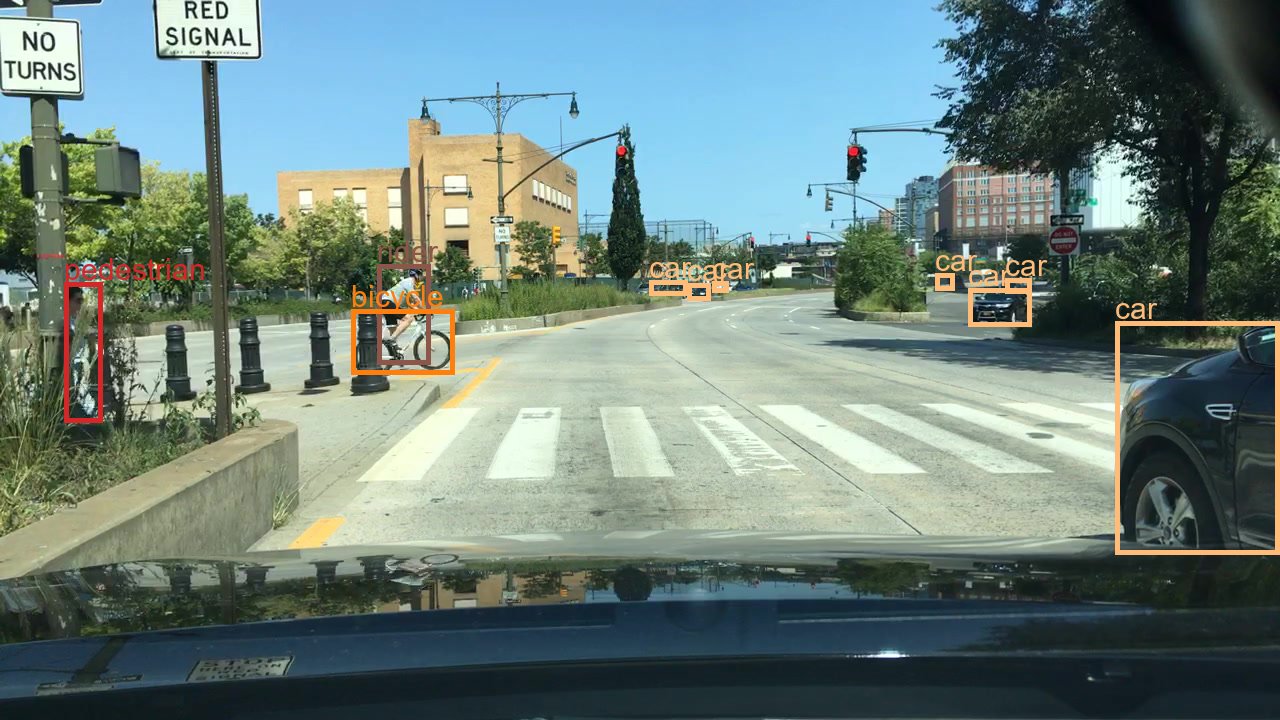

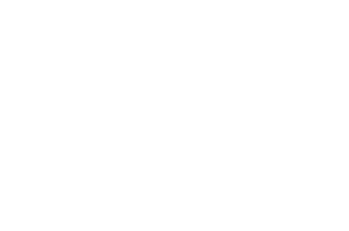

In [180]:
draw_bounding_box(im[145], la.loc[145]['labels'])

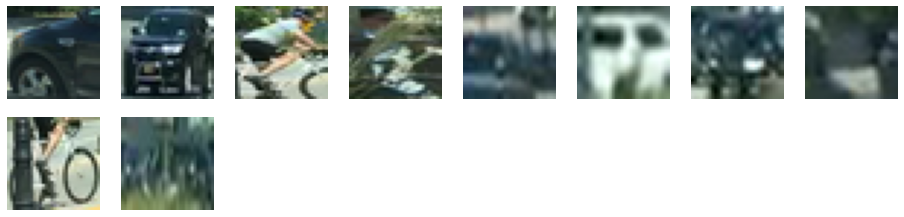

In [105]:
croped_images, category_list=crop_image_by_bounding_box(im[145], la.loc[145]['labels'] , resize_size=(32,32))

showImagesHorizontally(croped_images, show_by_image=True)

In [181]:
squared_json=convert_bounding_box_to_square(labels_path[50])

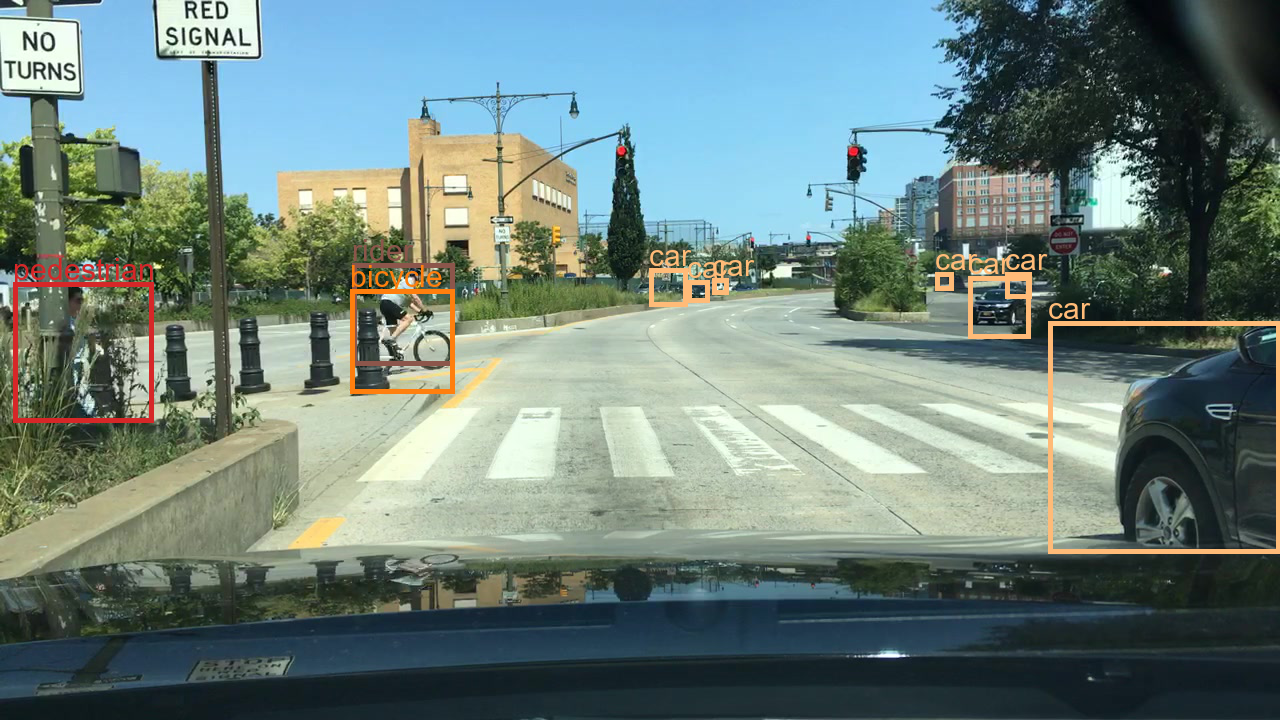

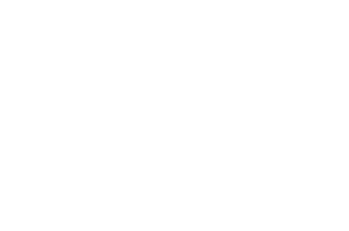

In [182]:
draw_bounding_box(im[145], squared_json.loc[145]['labels'])

### 데이터 처리 확인

In [211]:

im, la=index_to_images(50)
squared_json=convert_bounding_box_to_square(labels_path[50])

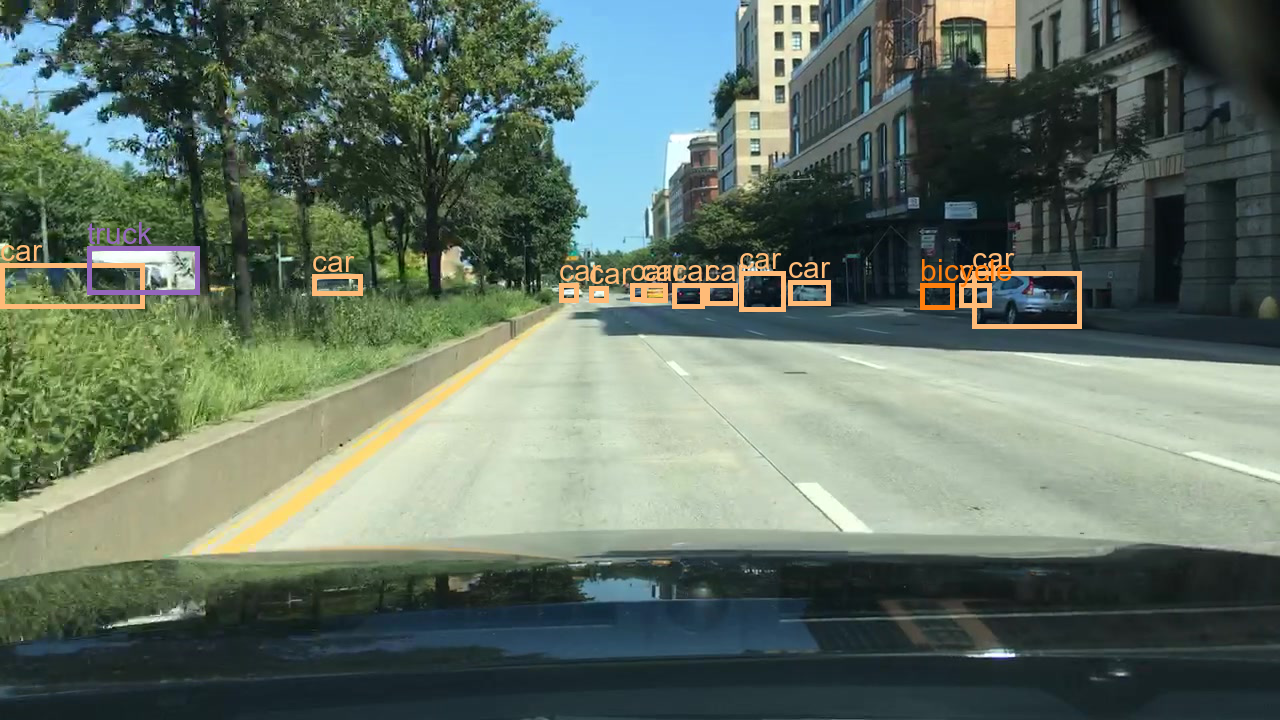

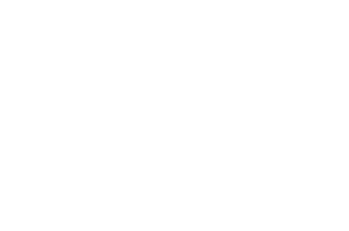

In [191]:
num=20
draw_bounding_box(im[num], la.loc[num]['labels'])


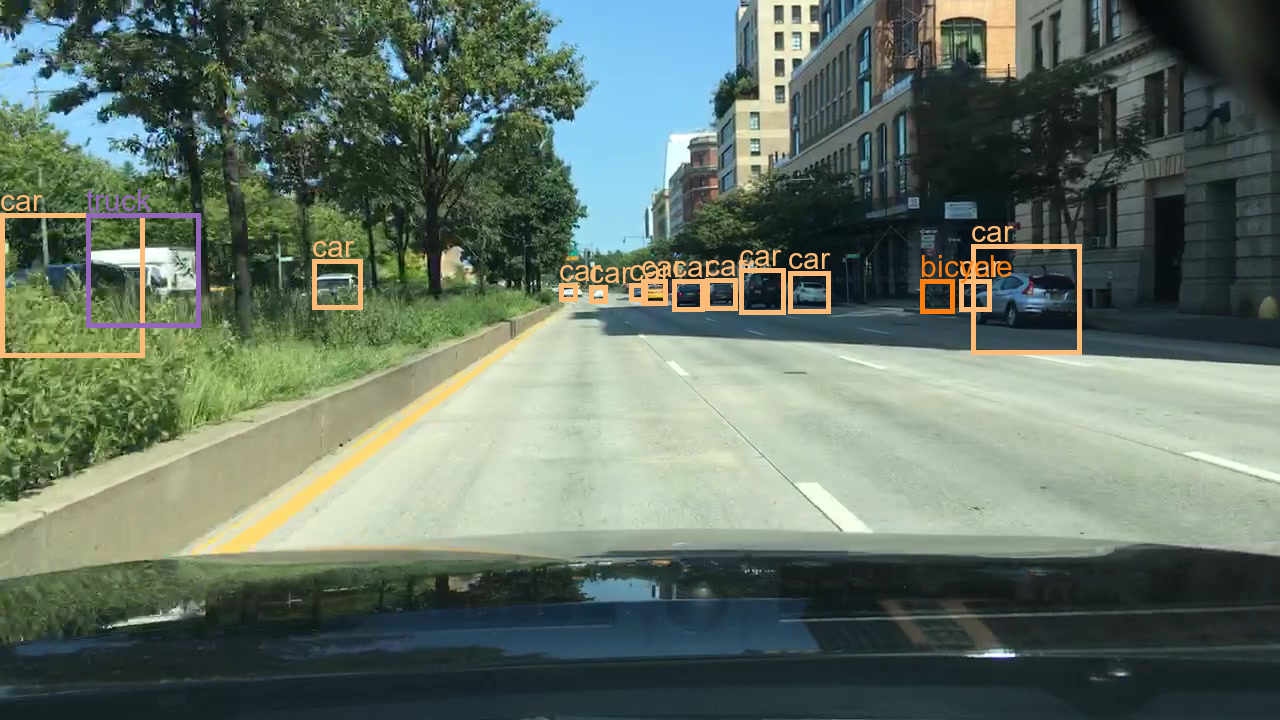

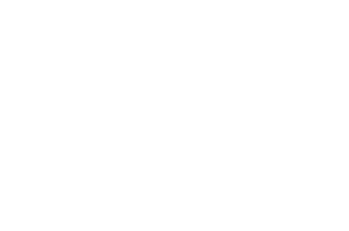

In [192]:
draw_bounding_box(im[num], squared_json.loc[num]['labels'])

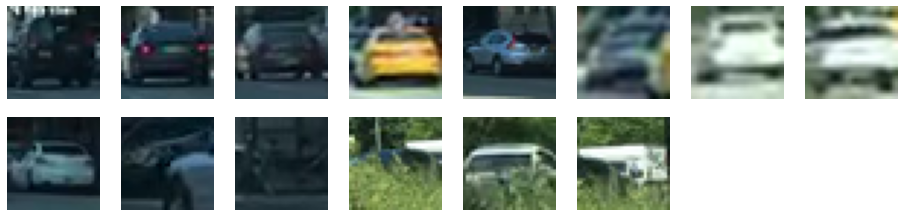

In [213]:
croped_images, category_list=crop_image_by_bounding_box(im[num], squared_json.loc[num]['labels'] , resize_size=(32,32))

showImagesHorizontally(croped_images, show_by_image=True)

### Training set 만들기 (단일폴더에

In [198]:
# image_save_path='../BDD100K_MOT2020_image/bdd100k/images/track/new_train_'+'{}'.format(str(convert_num))
# label_save_path='../BDD100K_MOT2020_label/bdd100k/labels/box_track_20/new_train_'+'{}'.format(str(convert_num))

# os.mkdir(image_save_path)
# os.mkdir(label_save_path)

In [204]:
# j=0

In [206]:
# # j 폴더에 들어있는 image들과 annotions 할당.
# im, la=index_to_images(j)

# # bounding box 정사각형으로 변경
# squared_json=convert_bounding_box_to_square(labels_path[j])

# folder_name=folder_names[j]
# folder_save_path=os.path.join(image_save_path, folder_name) # image.붙힘(0609)


# label_csv=pd.DataFrame(columns=['image', 'label'])

# # 폴더 생성
# if not os.path.exists(folder_save_path):
#     os.mkdir(folder_save_path)

# for i in range(len(la)): # jpg 하나에 대해
#     image_name=la.loc[i]['name'].split('.')[0]
#     croped_images, category_list=crop_image_by_bounding_box(im[i], squared_json.loc[i]['labels'] , resize_size=(32,32))

#     for idx, image in enumerate(croped_images):

#         image_new_name=image_name+'-{}'.format(idx+1) # folder-0000001-1 형태로 저장.
#         image.save(os.path.join(folder_save_path, image_new_name+'.jpg'))

#         label_csv=label_csv.append(pd.DataFrame([[image_new_name, category_list[idx]]], columns=label_csv.columns ))

# print('folder 하나에 대한 Training set 완료{}'.format(j))     
# print('image : ', folder_save_path)
# print('label : ', os.path.join(label_save_path, folder_name))

folder 하나에 대한 Training set 완료0
image :  ../BDD100K_MOT2020_image/bdd100k/images/track/new_train_2/0081e3ea-3f7b0282
label :  ../BDD100K_MOT2020_label/bdd100k/labels/box_track_20/new_train_2/0081e3ea-3f7b0282


In [208]:
squared_json.to_json(os.path.join(label_save_path, folder_name+'.json'))
label_csv.to_csv(os.path.join(label_save_path, folder_name+'.csv'))

## 한 폴더 -> 하나의 jpg -> (crop image) --> 여러개의 crop jpg(이전)  

| Car와 Pedestrian은 조금만 저장하자. --> 이건 Image folder 갈때.

In [219]:
def convert_full_folder(labels_path, images_folders_path, image_save_path, label_save_path ):
    for j in range(len(labels_path)): # 폴더
        # j 폴더에 들어있는 image들과 annotions 할당.
        im, la=index_to_images(j, images_folders_path)

        # bounding box 정사각형으로 변경
        squared_json=convert_bounding_box_to_square(labels_path[j])

        folder_name=folder_names[j]
        folder_save_path=os.path.join(image_save_path, folder_name) # image.


        label_csv=pd.DataFrame(columns=['image', 'label'])

        # 폴더 생성
        if not os.path.exists(folder_save_path):
            os.mkdir(folder_save_path)

        for i in range(len(la)): # jpg 하나에 대해
            image_name=la.loc[i]['name'].split('.')[0]
            croped_images, category_list=crop_image_by_bounding_box(im[i], squared_json.loc[i]['labels'] , resize_size=(32,32))

            for idx, image in enumerate(croped_images):

                image_new_name=image_name+'-{}'.format(idx+1) # folder-0000001-1 형태로 저장.
                image.save(os.path.join(folder_save_path, image_new_name+'.jpg'))

                label_csv=label_csv.append(pd.DataFrame([[image_new_name, category_list[idx]]], columns=label_csv.columns ))

        print('folder 하나에 대한 Training set 완료{}'.format(j))     
        print('image : ', folder_save_path)
        print('label : ', os.path.join(label_save_path, folder_name))
        squared_json.to_json(os.path.join(label_save_path, folder_name+'.json'))
        label_csv.to_csv(os.path.join(label_save_path, folder_name+'.csv'))

## 00001-1 에서 마지막 순서는 json 파일의 순서와 똑같다 !!!! 

In [176]:
la.loc[0]['labels']

[{'id': '00037555',
  'category': 'car',
  'attributes': {'occluded': False, 'truncated': False, 'crowd': False},
  'box2d': {'x1': 611.833855836725,
   'x2': 973.212666941484,
   'y1': 213.7717106624592,
   'y2': 532.720720028821}},
 {'id': '00037556',
  'category': 'car',
  'attributes': {'occluded': False, 'truncated': True, 'crowd': False},
  'box2d': {'x1': 1129.592000998114,
   'x2': 1278.6742905076617,
   'y1': 248.10907641968427,
   'y2': 516.4571975368702}}]

## for ImageFolder

In [109]:
save_path='../BDD100K_MOT2020_image/bdd100k/images/track/new_train'

root='../BDD100K_MOT2020_image/bdd100k/images/track/train_av'
root_test='../BDD100K_MOT2020_image/bdd100k/images/track/test_av'

In [110]:
label_save_path='../BDD100K_MOT2020_label/bdd100k/labels/box_track_20/new_train'

In [111]:
class_list=['trailer', 'motorcycle', 'bicycle', 'car', 'bus', 'other vehicle', 'pedestrian', 'other person', 'truck', 'train', 'rider']

In [21]:
# os.mkdir(root)

In [22]:
# for class_ in class_list:
#     os.mkdir(os.path.join(root, class_))

In [52]:
# os.mkdir(root_test)

In [53]:
# for class_ in class_list:
#     os.mkdir(os.path.join(root_test, class_))

In [46]:
folder_names

['0000f77c-6257be58',
 '0000f77c-62c2a288',
 '0000f77c-cb820c98',
 '0001542f-5ce3cf52',
 '0001542f-7c670be8',
 '0001542f-ec815219',
 '00054602-3bf57337',
 '00067cfb-5443fe39',
 '00067cfb-5adfaaa7',
 '00067cfb-caba8a02',
 '00067cfb-e535423e',
 '00067cfb-f1b91e3c',
 '0008a165-c48f4b3e',
 '00091078-59817bb0',
 '00091078-7cff8ea6',
 '00091078-84635cf2',
 '00091078-875c1f73',
 '00091078-c1d32eea',
 '00091078-cedbfea7',
 '00091078-f32de4d2',
 '000d35d3-41990aa4',
 '000d4f89-3bcbe37a',
 '000e0252-8523a4a9',
 '000f157f-30b30f5e',
 '000f157f-37797ff9',
 '000f157f-dab3a407',
 '000f8d37-d4c09a0f',
 '0010bf16-9ee17cd9',
 '0010bf16-a457685b',
 '00131ea7-624f538d',
 '00134776-9123d227',
 '001bad4e-2fa8f3b6',
 '001c5339-08faca55',
 '001c5339-13a07470',
 '001c5339-9a6cdd3e',
 '00202076-7a95b4e3',
 '00202076-9eaa8e42',
 '00207869-046fa443',
 '00207869-902288d1',
 '00211b17-ad3e206b',
 '00225f53-4200bde2',
 '00225f53-67614580',
 '00232de3-19eca24a',
 '0024b742-83709bd4',
 '0024b742-acbed4fb',
 '002685b6

### Train(in Image folder)

In [ ]:
fold

In [54]:
for folder in folder_names[3:160]:
    folder_labels=pd.read_csv(os.path.join(label_save_path, folder+'.csv'))
    for idx in range(len(folder_labels)):
        image_name=folder_labels.loc[idx]['image']
        label=folder_labels.loc[idx]['label']
        
        image_path=os.path.join(save_path, folder, image_name+'.jpg')
        image=Image.open(image_path)
        #print(os.path.join(root, label, image_name+'.jpg'))
        image.save(os.path.join(root, label, image_name+'.jpg'))
     
    print('{} -  folder'.format(folder))
        
        

0001542f-5ce3cf52 -  folder
0001542f-7c670be8 -  folder
0001542f-ec815219 -  folder
00054602-3bf57337 -  folder
00067cfb-5443fe39 -  folder
00067cfb-5adfaaa7 -  folder
00067cfb-caba8a02 -  folder
00067cfb-e535423e -  folder
00067cfb-f1b91e3c -  folder
0008a165-c48f4b3e -  folder
00091078-59817bb0 -  folder
00091078-7cff8ea6 -  folder
00091078-84635cf2 -  folder
00091078-875c1f73 -  folder
00091078-c1d32eea -  folder
00091078-cedbfea7 -  folder
00091078-f32de4d2 -  folder
000d35d3-41990aa4 -  folder
000d4f89-3bcbe37a -  folder
000e0252-8523a4a9 -  folder
000f157f-30b30f5e -  folder
000f157f-37797ff9 -  folder
000f157f-dab3a407 -  folder
000f8d37-d4c09a0f -  folder
0010bf16-9ee17cd9 -  folder
0010bf16-a457685b -  folder
00131ea7-624f538d -  folder
00134776-9123d227 -  folder
001bad4e-2fa8f3b6 -  folder
001c5339-08faca55 -  folder
001c5339-13a07470 -  folder
001c5339-9a6cdd3e -  folder
00202076-7a95b4e3 -  folder
00202076-9eaa8e42 -  folder
00207869-046fa443 -  folder
00207869-902288d1 - 

In [47]:
len(os.listdir(os.path.join(root, 'car')))

3402

### Test

In [51]:
for folder in folder_names[160:]:
    folder_labels=pd.read_csv(os.path.join(label_save_path, folder+'.csv'))
    
    for idx in range(len(folder_labels)):
        image_name=folder_labels.loc[idx]['image']
        label=folder_labels.loc[idx]['label']
        image_path=os.path.join(save_path, folder, image_name+'.jpg')
        image=Image.open(image_path)
        #print(os.path.join(root, label, image_name+'.jpg'))
        image.save(os.path.join(root_test, label, image_name+'.jpg'))
     
    print('{} -  folder'.format(folder))
        
        

0070bc56-7d01076a -  folder
0070bc56-8d8cfd82 -  folder
00714cd3-48d6b290 -  folder
0071d9c5-0f52d539 -  folder
0071d9c5-be7394cc -  folder
00721168-56efa5c2 -  folder
0075a5b0-9a8d5dbb -  folder
0075b179-8e09869a -  folder
007693e6-2535e7bf -  folder
007693e6-bc55f0e4 -  folder
007693e6-c2a8b9a7 -  folder
00779058-517a4591 -  folder
0077ccb8-d5778190 -  folder
00787a90-b350f376 -  folder
007ae77f-79995643 -  folder
007aeb45-3e75ce0e -  folder
007aeb45-56d1aed9 -  folder
007aeb45-9330e852 -  folder
007aeb45-96ce245e -  folder
007aeb45-c601742b -  folder
007aeb45-eef41701 -  folder
007aeb45-f9f5ac8c -  folder
007b11e5-1033ff33 -  folder
007b11e5-c22ddae8 -  folder
007c01ea-63aa326c -  folder
007c01ea-a02f29ef -  folder
007c01ea-ad9f940b -  folder
007c11bf-f6da335c -  folder
007da0eb-1bad8468 -  folder
007da0eb-8cca23d7 -  folder
007da0eb-e1f588e8 -  folder
007eddfc-528c4da4 -  folder
007eddfc-bcaeb35b -  folder
0080b637-55f7930e -  folder
00810e80-37641274 -  folder
0081c36b-30bff234 - 

## 할 것

### 1. _get_dataset 함수 변경
### 1.5 데이터 불균형 해소 및 데이터 어그멘테이션
### 2. pytorch.dataset 형태로 적제 이후 Resnet 학습  
> ( Adversarial training(AE) / Standard Learning(LIME, SHAP, GradCAM)  
### 3. 모델 별 비교 
### A. 이미지 재합성 등 분석

### 이미지 개수

In [4]:
labels=os.listdir(root)

In [7]:
for label in labels:
    print(label)

trailer
motorcycle
bicycle
car
bus
other vehicle
pedestrian
other person
truck
train
rider


In [6]:
for label in labels:
    print(len(os.listdir(os.path.join(root, label))))
    

356
983
3505
228850
7549
2699
44011
422
15033
4
1919


In [19]:
train_car_backup='../BDD100K_MOT2020_image/bdd100k/images/track/train_car_backup'

In [20]:
os.mkdir(train_car_backup)

In [11]:
import os
import shutil
train_Car=os.listdir(os.path.join(root, 'car'))


In [14]:
mov_files=[]

for image in train_Car[::2]: # 짝수 파일만.
    mov_files.append(image)

In [ ]:
len(mov_files)

In [27]:
movfi

'0000f77c-6257be58-0000001-1.jpg'

In [36]:
i=0
for movfi in mov_files[23026:]:
    i+=1
    shutil.move(os.path.join(root,'car', movfi), os.path.join(train_car_backup, movfi))

In [37]:
len(os.listdir(os.path.join(root, 'car')))

114425

In [38]:
mov_files=[]

for image in train_Car[1::4]: # 짝수 파일만.
    mov_files.append(image)

In [40]:
i=0
for movfi in mov_files:
    i+=1
    shutil.move(os.path.join(root,'car', movfi), os.path.join(train_car_backup, movfi))

# Test car image 백업하기

In [55]:
test_car_backup='../BDD100K_MOT2020_image/bdd100k/images/track/test_car_backup'

In [56]:
test_car=os.listdir(os.path.join(root_test, 'car'))


In [61]:
os.mkdir(test_car_backup)

In [57]:
mov_files=[]

for image in test_car[::2]: # 짝수 파일만.
    mov_files.append(image)

In [58]:
for image in test_car[1::4]: # 짝수 파일만.
    mov_files.append(image)

In [62]:
i=0
for movfi in mov_files:
    i+=1
    shutil.move(os.path.join(root_test,'car', movfi), os.path.join(test_car_backup, movfi))

In [63]:
len(os.listdir(os.path.join(root_test, 'car')))

14257

'trailer'  : n=50, train- > test
'train' : n=1, train->test

In [67]:
train_trailer=os.listdir(os.path.join(root, 'trailer'))
test_trailer=os.listdir(os.path.join(root_test, 'trailer'))

In [71]:
mov_files=[]

for image in train_trailer[::7]:
    mov_files.append(image)

In [73]:
for movfi in mov_files:
    shutil.move(os.path.join(root, 'trailer', movfi), os.path.join(root_test, 'trailer', movfi))

In [82]:
train_train=os.listdir(os.path.join(root, 'train'))
test_train=os.listdir(os.path.join(root_test, 'train'))

In [92]:
mov_files=[]

for image in train_train[:1]:
    mov_files.append(image)

In [93]:
train_train

['005cdef0-180a776c-0000063-10.jpg',
 '005cdef0-180a776c-0000064-10.jpg',
 '005cdef0-180a776c-0000065-10.jpg',
 '005cdef0-180a776c-0000066-10.jpg']

In [95]:
mov_files

['005cdef0-180a776c-0000063-10.jpg']

In [96]:
for movfi in mov_files:
    shutil.move(os.path.join(root, 'train', movfi), os.path.join(root_test, 'trailer', movfi))

In [103]:
movfi=mov_files[0]

In [104]:
movfi

'005cdef0-180a776c-0000063-10.jpg'

In [105]:
shutil.move(os.path.join(root_test, 'trailer', movfi), os.path.join(root_test, 'train', movfi))

'../BDD100K_MOT2020_image/bdd100k/images/track/test_av/train/005cdef0-180a776c-0000063-10.jpg'

### Dataset 탐방 (결론 : 이미지는 모호하긴 하나 크게 문제는 없음)

In [113]:
labels

['trailer',
 'motorcycle',
 'bicycle',
 'car',
 'bus',
 'other vehicle',
 'pedestrian',
 'other person',
 'truck',
 'train',
 'rider']

In [168]:
root

'../BDD100K_MOT2020_image/bdd100k/images/track/train_av'

In [166]:
images=os.listdir(os.path.join(root, labels[0]))

image_list=[]
for image in images[250:275]:
    image_list.append(os.path.join(root, labels[0], image))

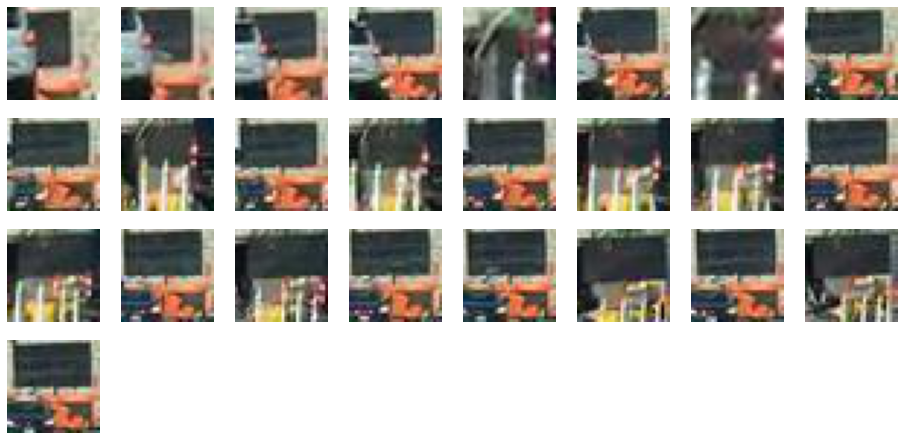

In [167]:
showImagesHorizontally(image_list)

In [ ]:
images_path='../BDD100K_MOT2020_image/bdd100k/images/track/train'

In [146]:
image_list[25]

'../BDD100K_MOT2020_image/bdd100k/images/track/train_av/trailer/00268999-0b20ef00-0000138-8.jpg'

In [148]:
os.path.join(images_path, '00268999-0b20ef00')

'../BDD100K_MOT2020_image/bdd100k/images/track/train/00268999-0b20ef00'

In [150]:
fold_list=os.listdir(os.path.join(images_path, '00268999-0b20ef00'))

In [155]:
im=plt.imread(os.path.join(images_path, '00268999-0b20ef00', fold_list[137]))

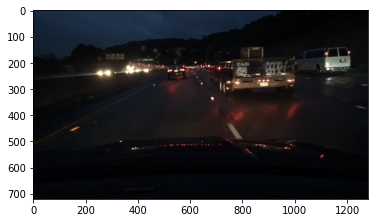

In [157]:
plt.imshow(im)